In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

### Generating data

In [7]:
sample_size = 250
x = np.array([np.linspace(0,1,sample_size) for i in range(2)])
x1, x2 = np.meshgrid(x[0],x[1])
e = np.array([np.random.normal(0,0.1**2,sample_size) for i in range(sample_size)])
y = np.sin(2*np.pi*x1)*np.sin(2*np.pi*x2) + e

<IPython.core.display.Javascript object>


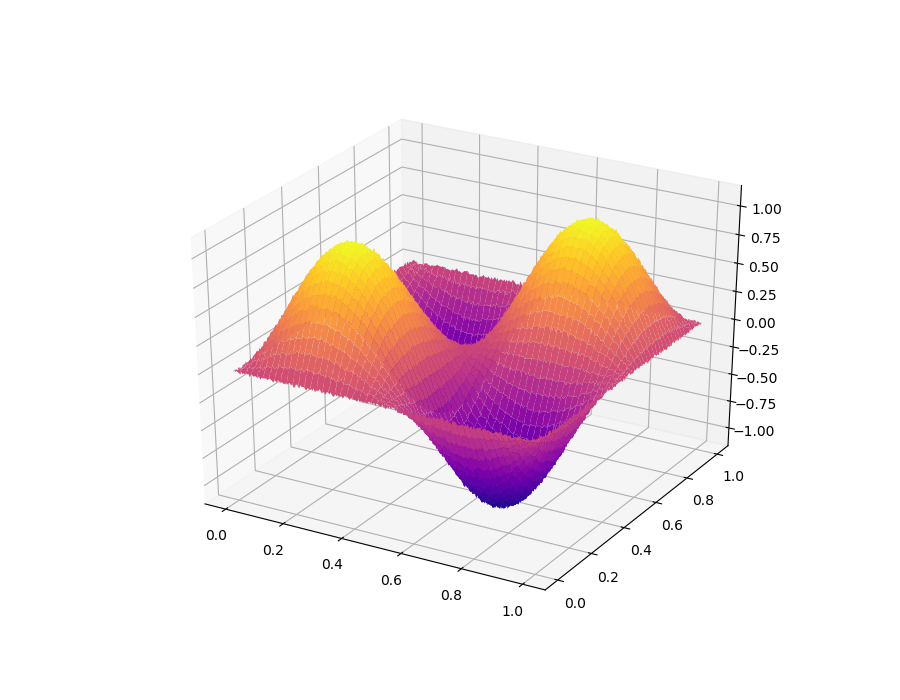

In [8]:
plt.figure(figsize=(9,7));
ax = plt.axes(projection='3d')
ax.plot_surface(x1,x2,y,cmap='plasma')

In [4]:
def f_phi(module,s=1):
    return np.e**(-module**2 / s**2)

Defining the gaussians positions

<IPython.core.display.Javascript object>


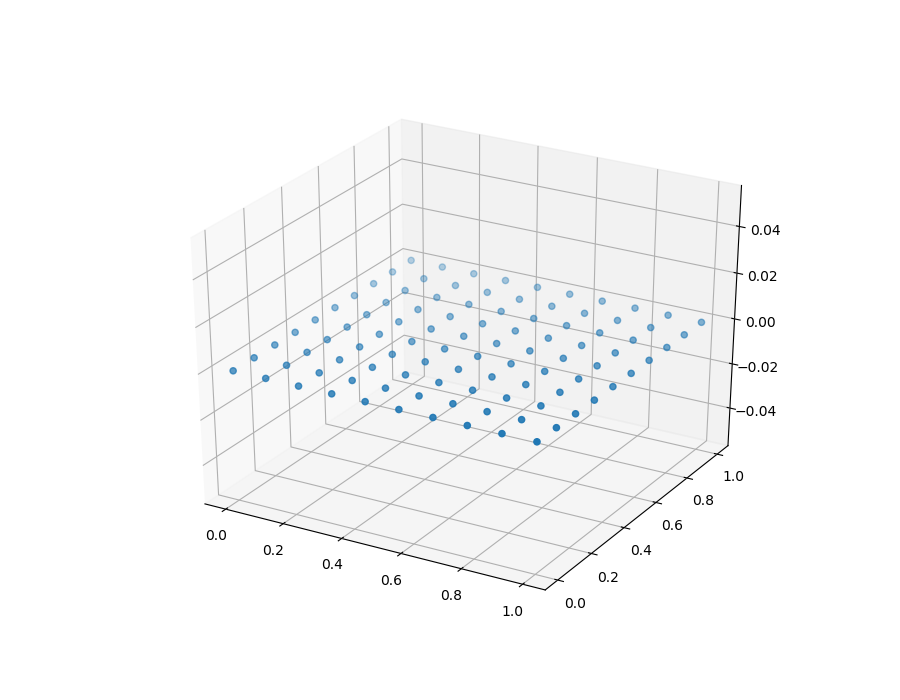

In [76]:
M = 10

mu1,mu2 = np.meshgrid((np.linspace(0,1,M)),(np.linspace(0,1,M)))

null = np.zeros((M,M))

fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mu1,mu2,null)
plt.show()

In [84]:
p1 = np.array([1,2,3])
p2 = np.array([2,5,4])
p1-p2

array([-1, -3, -1])

In [86]:
i=1
j=2
p1 = np.array([x1[i][j],x2[i][j]])
print(p1)

i=3
j=4
p2 = np.array([x1[i][j],x2[i][j]])
print(p2)

print(p1-p2)

[0.00803213 0.00401606]
[0.01606426 0.01204819]
[-0.00803213 -0.00803213]


In [92]:
M = 10;

phi = np.zeros((sample_size,M))

for i in range(sample_size):
    for j in range(M):
        p1 = np.array([x1[i][i],x2[i][i]])
        p2 = np.array([mu1[j][j],mu2[j][j]])
        d = np.linalg.norm(p1-p2)
        phi[i][j] = np.e**(-(d)**2 / 1**2)
phi.shape

(250, 10)

In [99]:
W = ((np.linalg.inv(phi.T@phi))@phi.T)@y

In [103]:
W.shape

(10, 250)

In [101]:
y.shape

(250, 250)

In [ ]:
y_pred = np.zeros((len(x),1))

for i in range(len(x)):
    y_pred[i][0] = sum([W[j][0]*f_phi(x[i],(1/M*j)) for j in range(M)])